# EDA Layer

## **Description:**

- Now we are going to attend a new DS step - **Exploratory Data Analysis**. We want to produce ML model for a business problem but are still unfamiliar with the underlying processes. Now, we have an opportunity to tackle this problem, 
- You need to explore your data to answer the following questions:
    - What I'm working with ?
    - What are the main patterns and tendencies with my data ?
    - How do my data entities interact ?
    - What should I do with my data to obtain good features ?
    - What are the problems with the probable prediction ?
    - How could I manually make predict based on data ? 


## **Possible Tools:**

- Data visualisation - seaborn, plotly, matplotlib
- Data processing - pandas, numpy, statsmodels, scikit-learn 
- Whatever you might find useful

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('../')
import scripts.eda as eda # etl.py module

In [2]:
train_df = pd.read_csv('../data/merged_train.csv')

train_df.head(3)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,month,year,item_name,item_category_id,item_category_name,shop_name
0,2013-01-02,0,59,22154,999.0,1,0,0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
1,2013-01-03,0,25,2552,899.0,1,0,0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
2,2013-01-05,0,25,2552,899.0,-1,0,0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935848 entries, 0 to 2935847
Data columns (total 12 columns):
 #   Column              Dtype  
---  ------              -----  
 0   date                object 
 1   date_block_num      int64  
 2   shop_id             int64  
 3   item_id             int64  
 4   item_price          float64
 5   item_cnt_day        int64  
 6   month               int64  
 7   year                int64  
 8   item_name           object 
 9   item_category_id    int64  
 10  item_category_name  object 
 11  shop_name           object 
dtypes: float64(1), int64(7), object(4)
memory usage: 268.8+ MB


In [4]:
train_df['date'] = pd.to_datetime(train_df['date'])

int_columns = ['date_block_num', 'shop_id', 'item_id', 'item_cnt_day', 'month', 'year', 'item_category_id']
float_columns = ['item_price']
object_columns = ['item_name', 'item_category_name', 'shop_name']

train_df = eda.transform_df_types(train_df, int_columns, float_columns, object_columns)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935848 entries, 0 to 2935847
Data columns (total 12 columns):
 #   Column              Dtype         
---  ------              -----         
 0   date                datetime64[ns]
 1   date_block_num      int32         
 2   shop_id             int32         
 3   item_id             int32         
 4   item_price          float32       
 5   item_cnt_day        int32         
 6   month               int32         
 7   year                int32         
 8   item_name           category      
 9   item_category_id    int32         
 10  item_category_name  category      
 11  shop_name           category      
dtypes: category(3), datetime64[ns](1), float32(1), int32(7)
memory usage: 123.9 MB


## We can analyze data sequentially column by column. Let's start with **date**

## **date** feature

In [5]:
train_df['date_month'] = train_df['date'].dt.month
train_df['date_year'] = train_df['date'].dt.year
train_df.head(3)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,month,year,item_name,item_category_id,item_category_name,shop_name,date_month,date_year
0,2013-01-02,0,59,22154,999.0,1,0,0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",1,2013
1,2013-01-03,0,25,2552,899.0,1,0,0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум""",1,2013
2,2013-01-05,0,25,2552,899.0,-1,0,0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум""",1,2013


<Axes: xlabel='date_month', ylabel='item_cnt_day'>

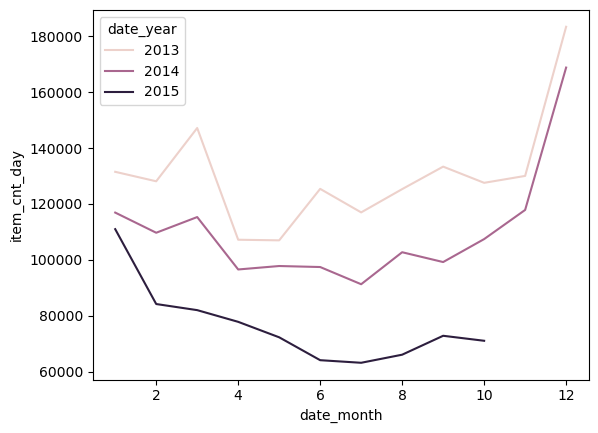

In [6]:
# look at trend lines for each year
train_year_month = train_df.groupby(['date_year', 'date_month']).agg({'item_cnt_day': 'sum'}).reset_index()

sns.lineplot(x='date_month', y='item_cnt_day', hue='date_year', data=train_year_month)

Text(0, 0.5, 'Sales Amount')

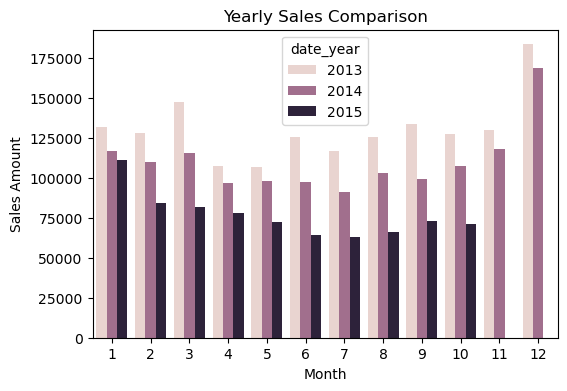

In [7]:
plt.figure(figsize=(6,4))
ax = sns.barplot(x='date_month', y='item_cnt_day', hue='date_year', data=train_year_month)
plt.title("Yearly Sales Comparison")
plt.xlabel("Month")
plt.ylabel("Sales Amount")

In [8]:
# the number of shop visits per year
train_df.groupby(['date_year'])['date'].count()

date_year
2013    1267561
2014    1055861
2015     612426
Name: date, dtype: int64

In [9]:
# average number of items sold during one visit per year
train_df.groupby(['date_year'])['item_cnt_day'].sum() / train_df.groupby(['date_year'])['date'].count()

date_year
2013    1.232865
2014    1.251007
2015    1.248451
dtype: float64

Now we can notice, that as the year number increases, the whole number of items sold per month decreases (while the trend lines look very similar).
From one point of view, this may be the result of the number of purchase observations decreasing by 16.7% in 2014 comparing to 2013. I believe, it doesn't
refer to data collecting issues and all the data is complete. What's more, the average number of items sold during one visit per year increased a little, so this may be just a small change in behavior of customers :)

### And in general, **month** and **year** are truly informative for future predictions because of the trend observed as well as the number of items sold reduction.

## Load and transform aggregated_train_df

In [10]:
aggregated_train_df = pd.read_csv('../data/merged_train_aggregated.csv')

int_columns = ['date_block_num', 'shop_id', 'item_id', 'item_cnt_month', 'month', 'year', 'item_category_id']
float_columns = ['item_price']
object_columns = ['item_name', 'item_category_name', 'shop_name']

aggregated_train_df = eda.transform_df_types(aggregated_train_df, int_columns, float_columns, object_columns)

## **item_cnt_month** feature

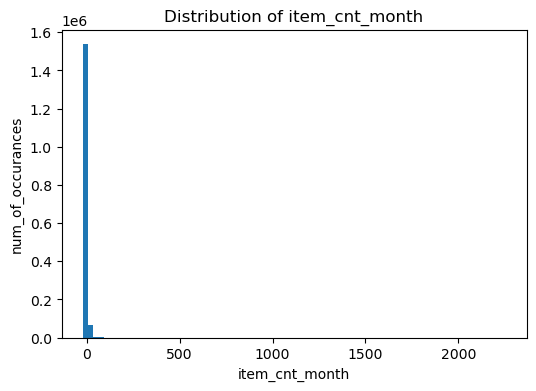

In [11]:
# plot histogram
plt.figure(figsize=(6, 4))
plt.hist(aggregated_train_df['item_cnt_month'], bins=80)
plt.xlabel('item_cnt_month')
plt.ylabel('num_of_occurances')
plt.title('Distribution of item_cnt_month')
plt.show()

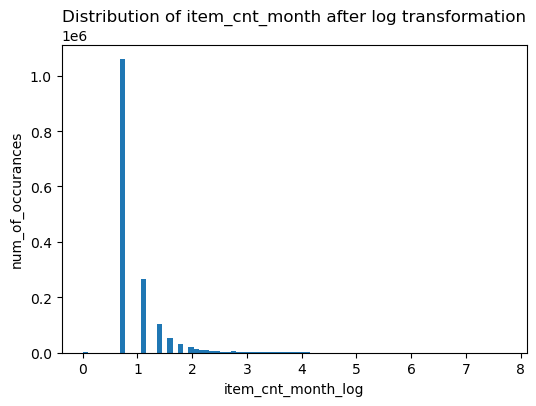

In [12]:
aggregated_train_df['item_cnt_month_log'] = np.log(np.abs(aggregated_train_df['item_cnt_month']) + 1) # add 1 to avoid log(0)
plt.figure(figsize=(6, 4))
plt.hist(aggregated_train_df['item_cnt_month_log'], bins=80)
plt.xlabel('item_cnt_month_log')
plt.ylabel('num_of_occurances')
plt.title('Distribution of item_cnt_month after log transformation')
plt.show()

## **item_price** feature

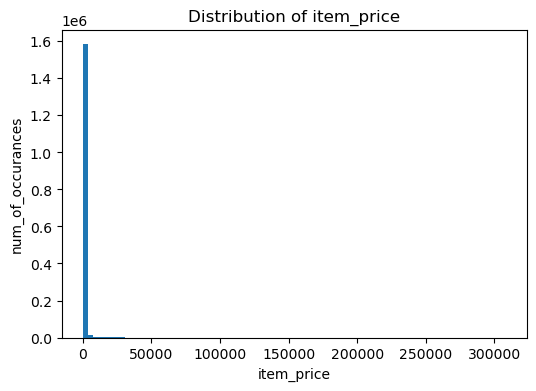

In [13]:
# plot histogram
plt.figure(figsize=(6, 4))
plt.hist(aggregated_train_df['item_price'], bins=80)
plt.xlabel('item_price')
plt.ylabel('num_of_occurances')
plt.title('Distribution of item_price')
plt.show()

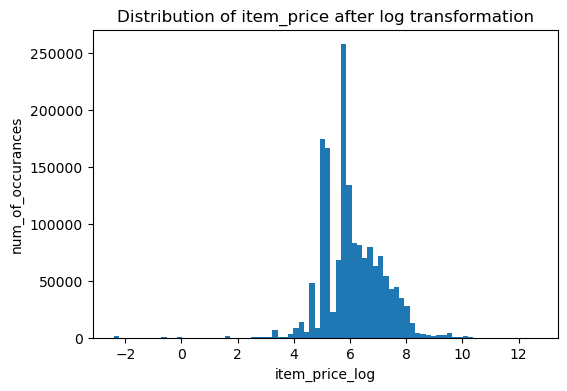

In [14]:
aggregated_train_df['item_price_log'] = np.log(np.abs(aggregated_train_df['item_price'])) # add 1 to avoid log(0)
plt.figure(figsize=(6, 4))
plt.hist(aggregated_train_df['item_price_log'], bins=80)
plt.xlabel('item_price_log')
plt.ylabel('num_of_occurances')
plt.title('Distribution of item_price after log transformation')
plt.show()

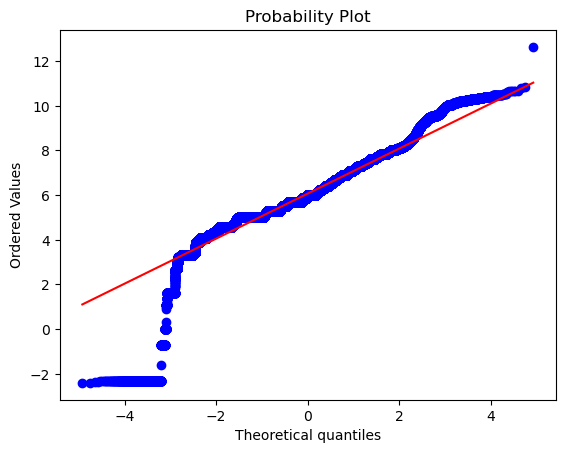

In [15]:
from scipy import stats

res = stats.probplot(aggregated_train_df['item_price_log'], plot=plt)

The distribution is almost normal, except for that "outliers" part

## **shop** features

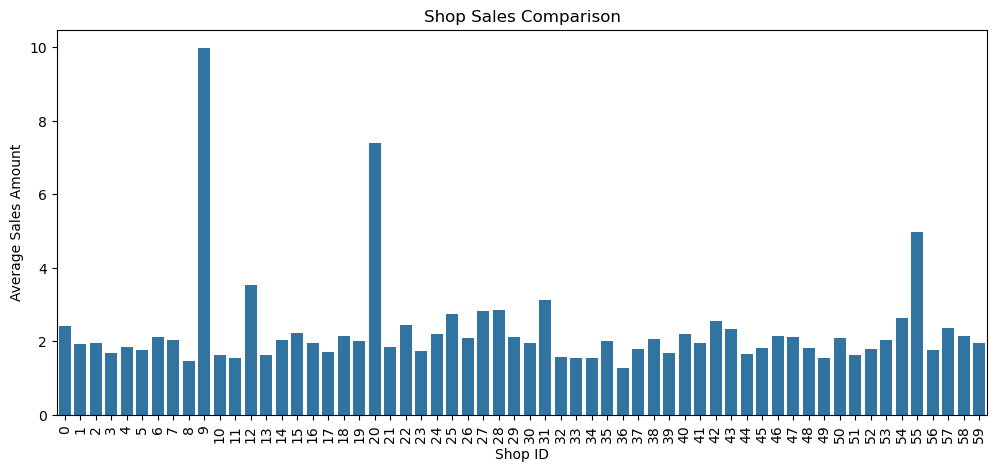

In [16]:
shop_id_aggregated = aggregated_train_df.groupby(['shop_id'])['item_cnt_month'].mean()

plt.figure(figsize=(12,5))
ax = sns.barplot(x=shop_id_aggregated.index, y=shop_id_aggregated.values)
plt.title("Shop Sales Comparison")
plt.xlabel("Shop ID")
plt.ylabel("Average Sales Amount")
plt.xticks(rotation=90);

Text(0.5, 1.0, 'Box Plots for Shop ID')

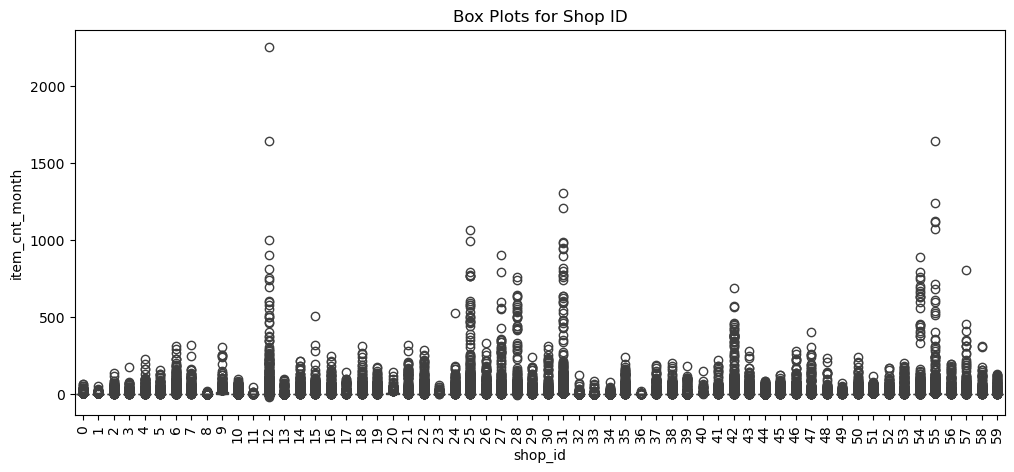

In [17]:
var = 'shop_id'
data = pd.concat([aggregated_train_df['item_cnt_month'], aggregated_train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 5))
fig = sns.boxplot(x=var, y="item_cnt_month", data=data)
plt.xticks(rotation=90)
plt.title("Box Plots for Shop ID")

There are ids having significantly more sales than others (like 9, 20 and etc.) What's interesting, they are not in the top in terms of outliers.

Let's see how do shop names look like

In [18]:
aggregated_train_df['shop_name'].unique().tolist()[:10]

['!Якутск Орджоникидзе, 56 фран',
 '!Якутск ТЦ "Центральный" фран',
 'Адыгея ТЦ "Мега"',
 'Балашиха ТРК "Октябрь-Киномир"',
 'Волжский ТЦ "Волга Молл"',
 'Воронеж (Плехановская, 13)',
 'Воронеж ТРЦ "Максимир"',
 'Воронеж ТРЦ Сити-Парк "Град"',
 'Жуковский ул. Чкалова 39м?',
 'Интернет-магазин ЧС']

In [19]:
aggregated_train_df['shop_city'] = aggregated_train_df['shop_name'].apply(lambda x: x.split(' ')[0])
print('Number of unique shop cities:', len(aggregated_train_df['shop_city'].unique()))
aggregated_train_df['shop_city'].unique()

Number of unique shop cities: 32


array(['!Якутск', 'Адыгея', 'Балашиха', 'Волжский', 'Воронеж',
       'Жуковский', 'Интернет-магазин', 'Казань', 'Калуга', 'Коломна',
       'Красноярск', 'Курск', 'Москва', 'Н.Новгород', 'Новосибирск',
       'Омск', 'РостовНаДону', 'СПб', 'Самара', 'Сергиев', 'Сургут',
       'Тюмень', 'Уфа', 'Химки', 'Чехов', 'Ярославль', 'Вологда',
       'Якутск', 'Цифровой', 'Выездная', 'Томск', 'Мытищи'], dtype=object)

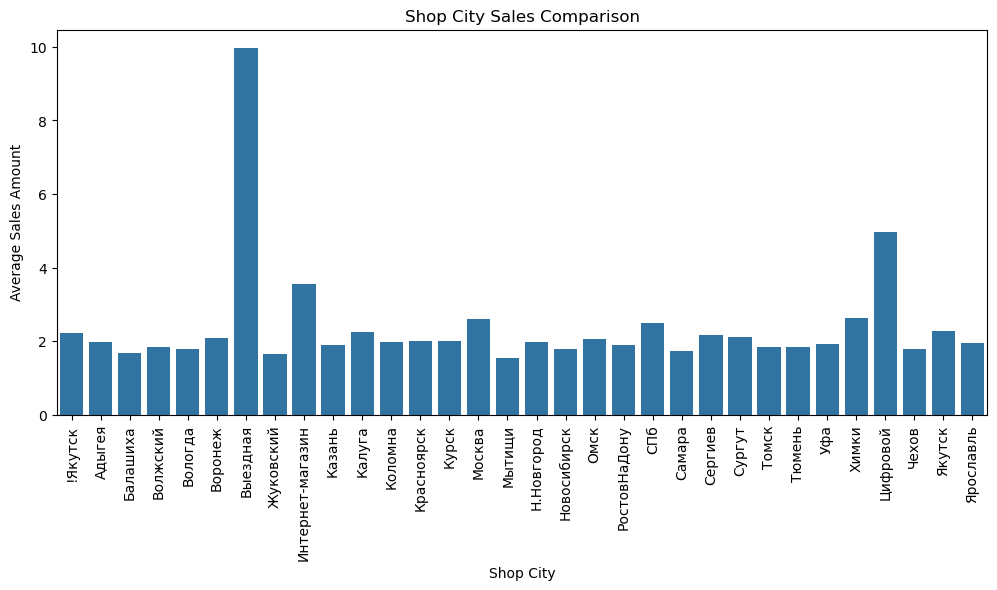

In [20]:
shop_city_aggregated = aggregated_train_df.groupby(['shop_city'])['item_cnt_month'].mean()

plt.figure(figsize=(12,5))
ax = sns.barplot(x=shop_city_aggregated.index, y=shop_city_aggregated.values)
plt.title("Shop City Sales Comparison")
plt.xlabel("Shop City")
plt.ylabel("Average Sales Amount")
plt.xticks(rotation=90);

In [21]:
print(aggregated_train_df[aggregated_train_df['shop_city'] == '!Якутск']['shop_name'].unique())
print(aggregated_train_df[aggregated_train_df['shop_city'] == 'Якутск']['shop_name'].unique())

['!Якутск Орджоникидзе, 56 фран', '!Якутск ТЦ "Центральный" фран']
Categories (60, object): ['!Якутск Орджоникидзе, 56 фран', '!Якутск ТЦ "Центральный" фран', 'Адыгея ТЦ "Мега"', 'Балашиха ТРК "Октябрь-Киномир"', ..., 'Чехов ТРЦ "Карнавал"', 'Якутск Орджоникидзе, 56', 'Якутск ТЦ "Центральный"', 'Ярославль ТЦ "Альтаир"']
['Якутск Орджоникидзе, 56', 'Якутск ТЦ "Центральный"']
Categories (60, object): ['!Якутск Орджоникидзе, 56 фран', '!Якутск ТЦ "Центральный" фран', 'Адыгея ТЦ "Мега"', 'Балашиха ТРК "Октябрь-Киномир"', ..., 'Чехов ТРЦ "Карнавал"', 'Якутск Орджоникидзе, 56', 'Якутск ТЦ "Центральный"', 'Ярославль ТЦ "Альтаир"']


'!Якутск' and 'Якутск' cities seam to have the same shops, so they should be united

In [22]:
# find corresponding shop ids
print('Орджоникидзе')
print(aggregated_train_df[aggregated_train_df['shop_name'] == '!Якутск Орджоникидзе, 56 фран']['shop_id'].unique())
print(aggregated_train_df[aggregated_train_df['shop_name'] == 'Якутск Орджоникидзе, 56']['shop_id'].unique())
print('Центральный')
print(aggregated_train_df[aggregated_train_df['shop_name'] == '!Якутск ТЦ "Центральный" фран']['shop_id'].unique())
print(aggregated_train_df[aggregated_train_df['shop_name'] == 'Якутск ТЦ "Центральный"']['shop_id'].unique())

Орджоникидзе
[0]
[57]
Центральный
[1]
[58]


In [23]:
aggregated_train_df[aggregated_train_df['shop_city'] == 'Жуковский']['shop_name'].unique()

['Жуковский ул. Чкалова 39м?', 'Жуковский ул. Чкалова 39м²']
Categories (60, object): ['!Якутск Орджоникидзе, 56 фран', '!Якутск ТЦ "Центральный" фран', 'Адыгея ТЦ "Мега"', 'Балашиха ТРК "Октябрь-Киномир"', ..., 'Чехов ТРЦ "Карнавал"', 'Якутск Орджоникидзе, 56', 'Якутск ТЦ "Центральный"', 'Ярославль ТЦ "Альтаир"']

In [24]:
print(aggregated_train_df[aggregated_train_df['shop_name'] == 'Жуковский ул. Чкалова 39м?']['shop_id'].unique())
print(aggregated_train_df[aggregated_train_df['shop_name'] == 'Жуковский ул. Чкалова 39м²']['shop_id'].unique())

[10]
[11]


The same issue for 'Жуковский ул. Чкалова 39м?' and 'Жуковский ул. Чкалова 39м²'

This should be also done for **test_df** (later when approving other transformations)

In [25]:
aggregated_train_df = eda.change_shop_attributes(aggregated_train_df)

# transform shop_city as well
aggregated_train_df['shop_city'] = aggregated_train_df['shop_name'].apply(lambda x: x.split(' ')[0])

## **item** features

In [26]:
item_names = aggregated_train_df['item_name'].unique().tolist()

item_names_strange = [item_name for item_name in item_names if not item_name[0].isalpha() and not item_name[0].isdigit()]

item_names_strange

['/ЗОЛОТАЯ КОЛЛЕКЦИЯ м/ф-72',
 '*МИХЕЙ И ДЖУМАНДЖИ  Сука любовь',
 '!ABBYY FineReader 12 Professional Edition Full [PC, Цифровая версия]',
 '***ГОЛУБАЯ ВОЛНА  (Univ)                      D',
 '***УДАР ПО ВОРОТАМ (UNI)               D',
 '/БОМБА ДЛЯ НЕВЕСТЫ /2DVD/               D',
 '***В ЛУЧАХ СЛАВЫ   (UNV)                    D',
 '***ЧАЙ С МУССОЛИНИ                     D',
 '***ШУГАРЛЭНДСКИЙ ЭКСПРЕСС (UNI)             D',
 '/ОДНАЖДЫ В КИТАЕ-2',
 '/ТЫ  - ТРУП',
 '//НЕ ОСТАВЛЯЮЩИЙ СЛЕДА (Регион)',
 '! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D',
 '***КОРОБКА (СТЕКЛО)                       D',
 '*СПАСАЯ ЭМИЛИ                           D',
 '/ПОСЛЕДНИЙ ШАНС',
 '//МОНГОЛ С.Бодров (Регион)',
 '/УМНОЖАЮЩИЙ ПЕЧАЛЬ т.2 (сер.3-4)',
 '*ЛИНИЯ СМЕРТИ                           D',
 '//АДРЕНАЛИН: ОДИН ПРОТИВ ВСЕХ (Регион)',
 '***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ  (UNI)             D',
 '***УДАР ПО ВОРОТАМ-2 (UNI)               D',
 '*ЧОКНУТЫЙ ПРОФЕССОР /МАГИЯ/             D',
 '*ЗА ГРАНЬЮ СМЕРТИ             

In [27]:
item_names_strange_D = [item_name for item_name in item_names if item_name.endswith('  D')]

item_names_strange_D

['***ГОЛУБАЯ ВОЛНА  (Univ)                      D',
 '***УДАР ПО ВОРОТАМ (UNI)               D',
 '/БОМБА ДЛЯ НЕВЕСТЫ /2DVD/               D',
 '***В ЛУЧАХ СЛАВЫ   (UNV)                    D',
 '***ЧАЙ С МУССОЛИНИ                     D',
 '***ШУГАРЛЭНДСКИЙ ЭКСПРЕСС (UNI)             D',
 '! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D',
 '***КОРОБКА (СТЕКЛО)                       D',
 '*СПАСАЯ ЭМИЛИ                           D',
 '*ЛИНИЯ СМЕРТИ                           D',
 '***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ  (UNI)             D',
 '***УДАР ПО ВОРОТАМ-2 (UNI)               D',
 '*ЧОКНУТЫЙ ПРОФЕССОР /МАГИЯ/             D',
 '*ЗА ГРАНЬЮ СМЕРТИ                       D']

In [28]:
train_strange_names = aggregated_train_df[aggregated_train_df['item_name'].isin(item_names_strange_D)]

train_strange_names[['item_name', 'item_cnt_month', 'item_price']]

,item_name,item_cnt_month,item_price
1013109,***ГОЛУБАЯ ВОЛНА (Univ) D,1,100.0
1013110,***УДАР ПО ВОРОТАМ (UNI) D,1,100.0
1033745,/БОМБА ДЛЯ НЕВЕСТЫ /2DVD/ D,1,58.0
1059283,***В ЛУЧАХ СЛАВЫ (UNV) D,1,58.0
1059284,***ГОЛУБАЯ ВОЛНА (Univ) D,1,58.0
1059285,***ЧАЙ С МУССОЛИНИ D,1,58.0
1059286,***ШУГАРЛЭНДСКИЙ ЭКСПРЕСС (UNI) D,1,58.0
1101022,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,1,58.0
1101023,***КОРОБКА (СТЕКЛО) D,1,58.0
1101024,***ЧАЙ С МУССОЛИНИ D,1,58.0


(Un)fortunately I see nothing strange in items ending with "    D" or starting with "*" or "/"or "!". Especially when there is < 30 of them

## **category** features

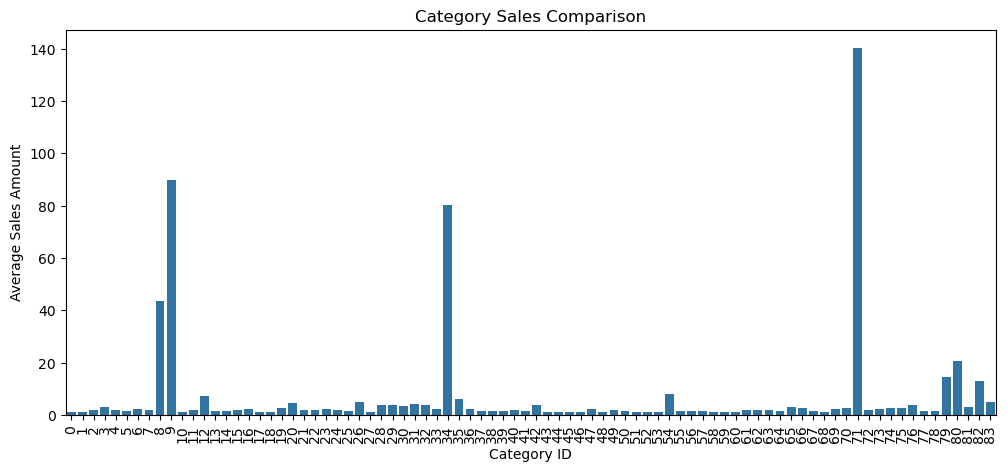

In [29]:
category_id_aggregated = aggregated_train_df.groupby(['item_category_id'])['item_cnt_month'].mean()

plt.figure(figsize=(12,5))
ax = sns.barplot(x=category_id_aggregated.index, y=category_id_aggregated.values)
plt.title("Category Sales Comparison")
plt.xlabel("Category ID")
plt.ylabel("Average Sales Amount")
plt.xticks(rotation=90);

Text(0.5, 1.0, 'Box Plots for Category ID')

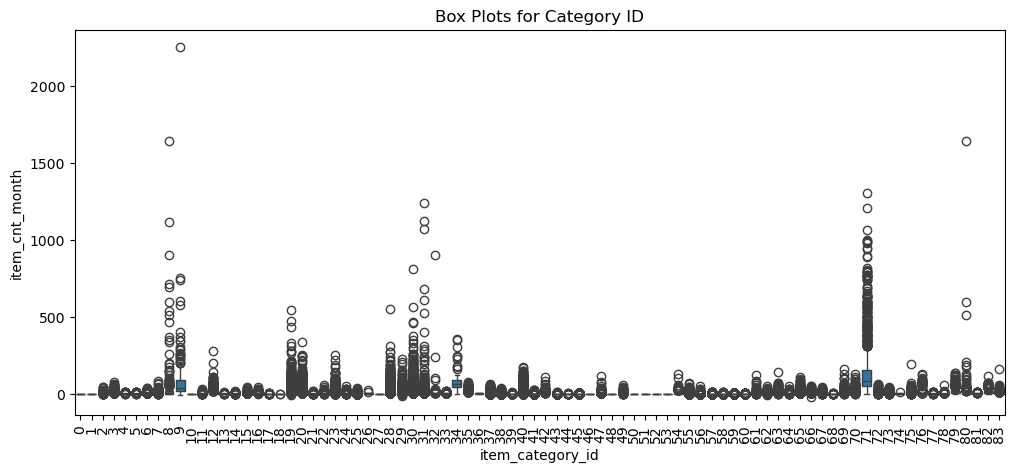

In [30]:
var = 'item_category_id'
data = pd.concat([aggregated_train_df['item_cnt_month'], aggregated_train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 5))
fig = sns.boxplot(x=var, y="item_cnt_month", data=data)
plt.xticks(rotation=90)
plt.title("Box Plots for Category ID")

In [31]:
# create a feature for large categories
aggregated_train_df['large_category_name'] = train_df['item_category_name'].apply(lambda x: x.split(' - ')[0])

aggregated_train_df['large_category_name'].unique().tolist()

['Кино',
 'Музыка',
 'Игры',
 'Игры PC',
 'Программы',
 'Книги',
 'Подарки',
 'Аксессуары',
 'Игровые консоли',
 'Карты оплаты',
 'Чистые носители (штучные)',
 'Чистые носители (шпиль)',
 'Служебные',
 'PC',
 'Элементы питания',
 'Доставка товара',
 'Карты оплаты (Кино, Музыка, Игры)']

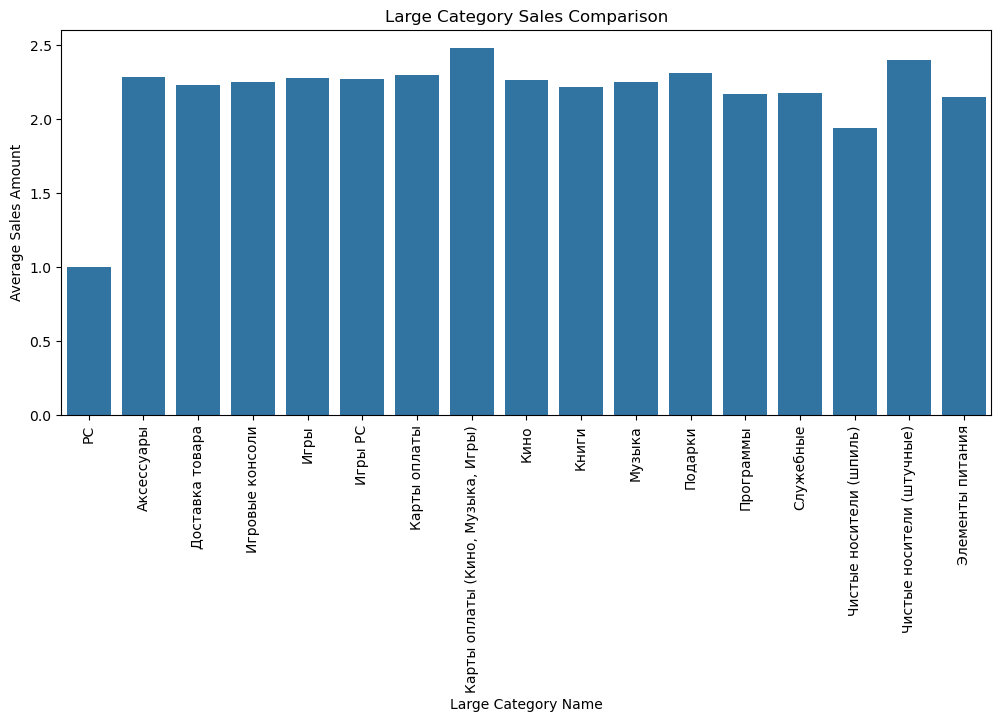

In [32]:
large_categories_aggregated = aggregated_train_df.groupby(['large_category_name'])['item_cnt_month'].mean()

plt.figure(figsize=(12,5))
ax = sns.barplot(x=large_categories_aggregated.index, y=large_categories_aggregated.values)
plt.title("Large Category Sales Comparison")
plt.xlabel("Large Category Name")
plt.ylabel("Average Sales Amount")
plt.xticks(rotation=90);

In [33]:
# another type of large category
categories = aggregated_train_df['item_category_name'].unique().tolist()
print([item_name for item_name in categories if 'PS3' in item_name])
print([item_name for item_name in categories if 'PS4' in item_name])

['Игры - PS3', 'Аксессуары - PS3', 'Игровые консоли - PS3']
['Аксессуары - PS4', 'Игры - PS4', 'Игровые консоли - PS4']


## Load and transform test_df

In [34]:
test_df = pd.read_csv('../data/merged_test.csv')

test_df = eda.change_shop_attributes(test_df)
test_df['large_category_name'] = test_df['item_category_name'].apply(lambda x: x.split(' - ')[0])
test_df['shop_city'] = test_df['shop_name'].apply(lambda x: x.split(' ')[0])

## Add lag features

In [35]:
aggregated_lagged_train_df = eda.train_add_lag_features(aggregated_train_df)
aggregated_lagged_train_df.isna().sum().sum()

/home/alexennk/Programs/INNOWISE/ml-ds-practice/notebooks/../scripts/eda.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1  1  1 ... 34 34 34]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  new_df.loc[:, 'date_block_num'] = new_df['date_block_num'] + lag


0

In [36]:
test_df = eda.test_add_lag_features(df=test_df, original_df=aggregated_train_df)
test_df.isna().sum().sum()

0

In [37]:
aggregated_lagged_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1609124 entries, 0 to 1609123
Data columns (total 18 columns):
 #   Column                Non-Null Count    Dtype   
---  ------                --------------    -----   
 0   date_block_num        1609124 non-null  int32   
 1   shop_id               1609124 non-null  int32   
 2   item_id               1609124 non-null  int32   
 3   item_cnt_month        1609124 non-null  int32   
 4   item_price            1609124 non-null  float32 
 5   month                 1609124 non-null  int32   
 6   year                  1609124 non-null  int32   
 7   item_name             1609124 non-null  category
 8   item_category_id      1609124 non-null  int32   
 9   item_category_name    1609124 non-null  category
 10  shop_name             1609124 non-null  category
 11  item_cnt_month_log    1609124 non-null  float64 
 12  item_price_log        1609124 non-null  float32 
 13  shop_city             1609124 non-null  object  
 14  large_category_nam

## Count average shop-item price

Do this for adding some information about items price into train process as well into test dataset

In [38]:
train_df['item_price_log'] = np.log(train_df['item_price'])
train_avg_price = train_df.groupby(['shop_id', 'item_id']).agg({'item_price_log': 'mean'}).reset_index()

In [39]:
aggregated_lagged_train_df.drop(['item_price_log', 'item_price'], axis=1, inplace=True)

aggregated_lagged_train_df = aggregated_lagged_train_df.merge(train_avg_price, on=['shop_id', 'item_id'], how='left')

As we remember, there are item_id values in the test set, that are not presented in the original train set:

In [40]:
test_set = set(test_df['item_id'].unique().tolist())
train_set = set(train_df['item_id'].unique().tolist())

len(test_set - train_set)

363

That's why, merging test-df with train_avg_price will result in missing values. I will fill them with price averaged by category

In [41]:
train_category_avg_price = train_df.groupby(['item_category_id']).agg({'item_price_log': 'mean'}).reset_index()

test_df = test_df.merge(train_avg_price, on=['shop_id', 'item_id'], how='left')
test_df = test_df.merge(train_category_avg_price, on=['item_category_id'], how='left')
test_df.isna().sum()

ID                           0
shop_id                      0
item_id                      0
item_name                    0
item_category_id             0
item_category_name           0
shop_name                    0
large_category_name          0
shop_city                    0
item_cnt_month_lag_1         0
item_cnt_month_lag_2         0
item_cnt_month_lag_3         0
item_price_log_x        104636
item_price_log_y             0
dtype: int64

In [42]:
test_df.head(1)

,ID,shop_id,item_id,item_name,item_category_id,item_category_name,shop_name,large_category_name,shop_city,item_cnt_month_lag_1,item_cnt_month_lag_2,item_cnt_month_lag_3,item_price_log_x,item_price_log_y
0,0,5,5037,"NHL 15 [PS3, русские субтитры]",19,Игры - PS3,"Вологда ТРЦ ""Мармелад""",Игры,Вологда,0.0,1.0,3.0,7.314764,7.159389


In [43]:
test_df.rename(columns={'item_price_log_x': 'item_price_log', 'item_price_log_y': 'category_price_log'}, inplace=True)

test_df['item_price_log'] = test_df['item_price_log'].fillna(test_df['category_price_log'])
test_df.drop('category_price_log', axis=1, inplace=True)
test_df.isna().sum().sum()

0

## Create new features from shop_id, category_id

This will add a categorical feature based on *shop_id / category_id / shop_city / large-category* with 3 possible values:
- 0 for values, where sales are less than 1st quantile 
- 1 for values, where sales are less than 3rd quantile and greater than 1st quantile 
- 2 for values, where sales are greater than 3rd quantile 

### category_id

In [44]:
aggregated_lagged_train_df = eda.threshold_sales(aggregated_lagged_train_df, aggregated_lagged_train_df, 'item_category_id')
test_df = eda.threshold_sales(aggregated_lagged_train_df, test_df, 'item_category_id', on_test=True)

### shop_id

In [45]:
aggregated_lagged_train_df = eda.threshold_sales(aggregated_lagged_train_df, aggregated_lagged_train_df, 'shop_id')
test_df = eda.threshold_sales(aggregated_lagged_train_df, test_df, 'shop_id', on_test=True)

### shop_city

In [46]:
aggregated_lagged_train_df = eda.threshold_sales(aggregated_lagged_train_df, aggregated_lagged_train_df, 'shop_city')
test_df = eda.threshold_sales(aggregated_lagged_train_df, test_df, 'shop_city', on_test=True)

### large_category

In [47]:
aggregated_lagged_train_df = eda.threshold_sales(aggregated_lagged_train_df, aggregated_lagged_train_df, 'large_category_name')
test_df = eda.threshold_sales(aggregated_lagged_train_df, test_df, 'large_category_name', on_test=True)

## Check correlation with heatmap

<Axes: >

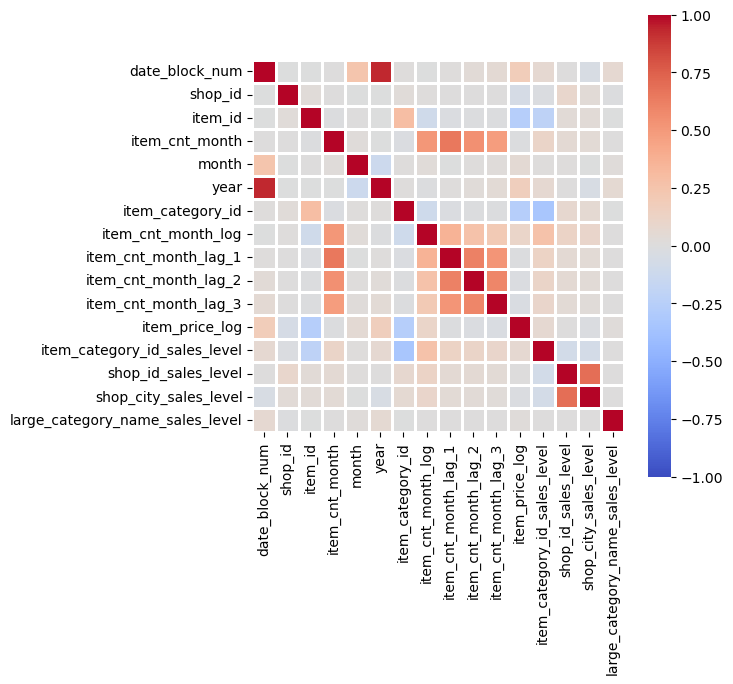

In [48]:
numeric_train_df = aggregated_lagged_train_df.select_dtypes(include=np.number)
f, ax = plt.subplots()
f.set_size_inches(6, 6)
sns.heatmap(numeric_train_df.corr(), vmin=-1, vmax=1, center=0, cmap='coolwarm', linewidths=2, square=True)

**year** and **date_block_num** features are highly correlated, but I'll leave **date_block_num** for now to use it for aggregation in the future "split into train, test, validation sets" operation

## Export resulting dataframes

In [49]:
test_df.head(3)

,ID,shop_id,item_id,item_name,item_category_id,item_category_name,shop_name,large_category_name,shop_city,item_cnt_month_lag_1,item_cnt_month_lag_2,item_cnt_month_lag_3,item_price_log,item_category_id_sales_level,shop_id_sales_level,shop_city_sales_level,large_category_name_sales_level
0,0,5,5037,"NHL 15 [PS3, русские субтитры]",19,Игры - PS3,"Вологда ТРЦ ""Мармелад""",Игры,Вологда,0.0,1.0,3.0,7.314764,1,1,0,1.0
1,1,5,5320,ONE DIRECTION Made In The A.M.,55,Музыка - CD локального производства,"Вологда ТРЦ ""Мармелад""",Музыка,Вологда,0.0,0.0,0.0,5.592290,1,1,0,1.0
2,2,5,5233,"Need for Speed Rivals (Essentials) [PS3, русск...",19,Игры - PS3,"Вологда ТРЦ ""Мармелад""",Игры,Вологда,1.0,3.0,1.0,6.703698,1,1,0,1.0


In [50]:
aggregated_lagged_train_df.head(3)

,date_block_num,shop_id,item_id,item_cnt_month,month,year,item_name,item_category_id,item_category_name,shop_name,...,shop_city,large_category_name,item_cnt_month_lag_1,item_cnt_month_lag_2,item_cnt_month_lag_3,item_price_log,item_category_id_sales_level,shop_id_sales_level,shop_city_sales_level,large_category_name_sales_level
0,0,57,32,6,0,0,1+1,40,Кино - DVD,"Якутск Орджоникидзе, 56",...,Якутск,Кино,0.0,0.0,0.0,5.417350,1,2,2,1
1,0,57,33,3,0,0,1+1 (BD),37,Кино - Blu-Ray,"Якутск Орджоникидзе, 56",...,Якутск,Музыка,0.0,0.0,0.0,5.320343,1,2,2,1
2,0,57,35,1,0,0,10 ЛЕТ СПУСТЯ,40,Кино - DVD,"Якутск Орджоникидзе, 56",...,Якутск,Музыка,0.0,0.0,0.0,5.988961,1,2,2,1


In [51]:
aggregated_lagged_train_df.to_csv('../data/result_train_df.csv', index=False)
test_df.to_csv('../data/result_test_df.csv', index=False)

## **Conclusion**

Summing all up, some of the main results of EDA Layer are:
1. There is periodicity across years as well as the decrease of **total sales** as **year** number increases. 
2. **"item_price"** feature gets symmetric distribution after performing log transformation => I replaced the original feature with the transformed one.
3. I will handle outliers in **"item_price"** and **"item_cnt_day"** features when building models - they may not affect model quality.
4. Some shops, cities and categories are significantly more popular than others => I created categorical variables that reflect this.
5. To extract some information from **"item_price"** feature, I calculated average price for each "item-shop" pair and filled missing values with average category price.
6. Added lag features for **"item_cnt_month"** column.
7. Found out some strange item and shop names and transformed some of them.